<a href="https://colab.research.google.com/github/Sanjay05-coder/Logistic-Regression-Marketing-Dataset./blob/main/Logistic_Regression_Marketing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split# training
from sklearn.linear_model import LogisticRegression # logistic regression library
from sklearn.metrics import confusion_matrix # model eval
import matplotlib.pyplot as plt# visuals
from sklearn.metrics import accuracy_score # to evaluate how accurate model is
import seaborn as sns# visuals
from sklearn.preprocessing import LabelEncoder # import label encoders to handle non numerical data

#Load dataset

In [ ]:
df=pd.read_csv('/content/Marketingcampaigns.csv')

In [ ]:
df.head()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


## Changing Location to numerical value

In [ ]:
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])


# Define X and y

In [ ]:
X=df[['Location','Email Opened','Email Clicked','Product page visit','Discount offered']]
y=df['Purchased']

# Train Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

##Call Logistic Regression Function

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Make Prediciton

In [ ]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {round(accuracy,2)}')

Accuracy : 0.75


# Create Confusion Matrix

In [ ]:
conf_matrix=confusion_matrix(y_pred,y_test)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

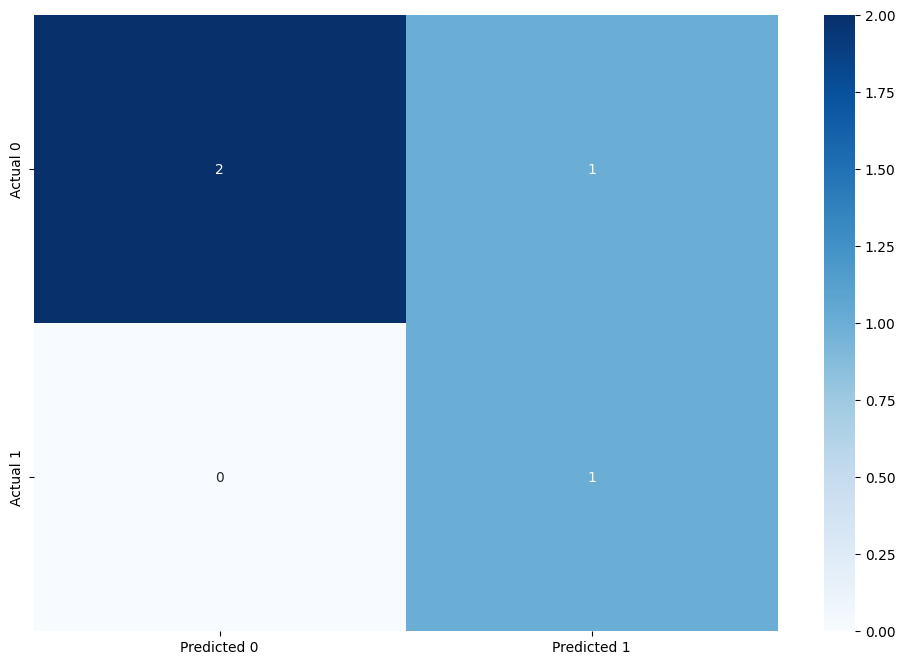

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])

plt.xticklabels('Predicted Labels')
plt.yticklabels('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
corr=df.corr()
corr

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
Customer id,1.000000,0.409180,0.200440,0.115483,-6.936880e-02,-7.079923e-02,0.068729,-0.156080,2.081064e-01
Age,0.409180,1.000000,0.062007,-0.224541,-7.670290e-02,-5.445883e-02,-0.322283,-0.370175,-1.767502e-01
Gender,0.200440,0.062007,1.000000,0.361896,-3.015113e-01,-1.230915e-01,-0.312519,-0.100504,1.005038e-01
Location,0.115483,-0.224541,0.361896,1.000000,1.479791e-01,-2.013740e-02,-0.201501,-0.147979,2.466318e-01
Email Opened,-0.069369,-0.076703,-0.301511,0.147979,1.000000e+00,1.133117e-17,-0.060971,-0.200000,0.000000e+00
Email Clicked,-0.070799,-0.054459,-0.123091,-0.020137,1.133117e-17,1.000000e+00,0.485381,0.408248,-1.699675e-17
Product page visit,0.068729,-0.322283,-0.312519,-0.201501,-6.097108e-02,4.853811e-01,1.000000,0.731653,3.048554e-01
Discount offered,-0.156080,-0.370175,-0.100504,-0.147979,-2.000000e-01,4.082483e-01,0.731653,1.000000,4.000000e-01
Purchased,0.208106,-0.176750,0.100504,0.246632,0.000000e+00,-1.699675e-17,0.304855,0.400000,1.000000e+00


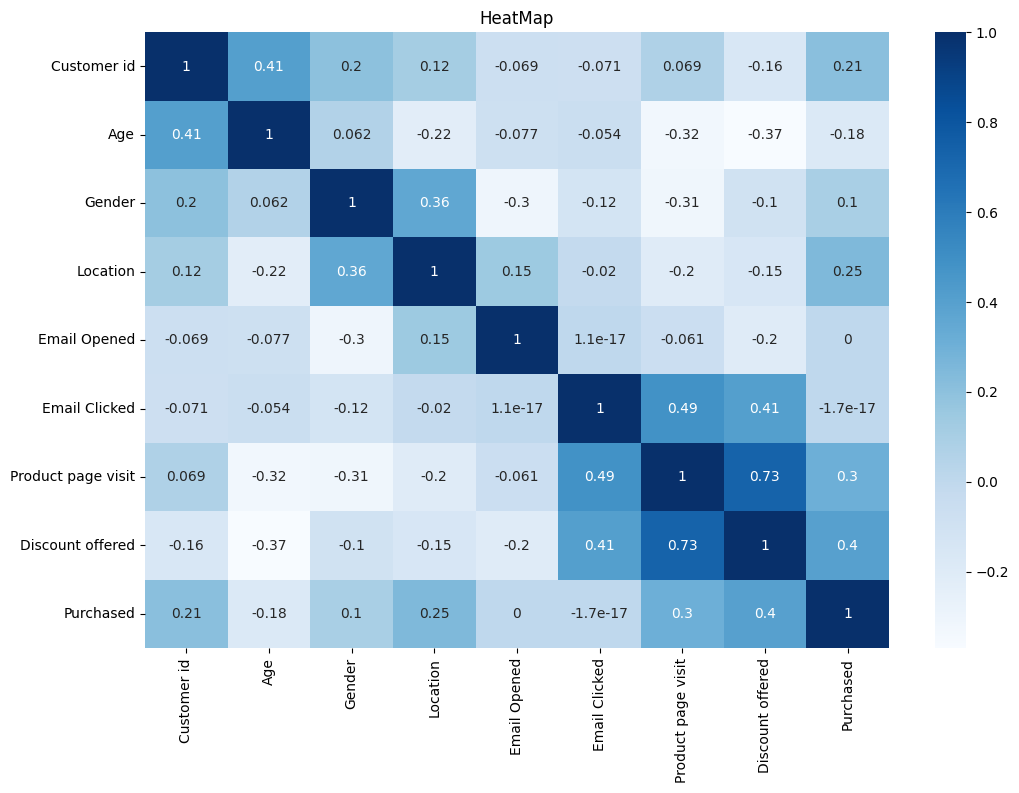

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(corr,annot=True,cmap='Blues')

plt.title('HeatMap')
plt.show()

# Conclusion

I would say that this is a good model looking at the confusion matrix. with only one missclassification .